# Installation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# run this cell to install pycaret in Google Colab
!pip install pycaret

In [3]:
from pycaret.utils import version
version()

'2.3.10'

# 1. Importing Dataset

In [4]:
import pandas as pd
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_stations/marin.csv",
                      parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")

#drop duplicate index
station = station[~station.index.duplicated()]

#resample prec accumulated hour before
station["prec_1hour_b"] = station.resample("H",label="right",closed="right").sum()
station["prec_1hour_f"] = station["prec"].resample("H",label="left",closed="right").sum()

print(station.head(25))

print("\nObserved labeled variable results")
obv_r = pd.concat([station["prec_1hour_b"].value_counts().rename("Total"),
           station["prec_1hour_b"].value_counts(normalize=True).rename("Percentage").map(lambda n: '{:.1%}'.format(n))],axis=1)
obv_r.head(15)

                     prec  prec_1hour_b  prec_1hour_f
time                                                 
2021-03-11 00:10:00   0.0           NaN           NaN
2021-03-11 00:20:00   0.1           NaN           NaN
2021-03-11 00:30:00   0.0           NaN           NaN
2021-03-11 00:40:00   0.0           NaN           NaN
2021-03-11 00:50:00   0.1           NaN           NaN
2021-03-11 01:00:00   0.1           0.3           1.8
2021-03-11 01:10:00   0.2           NaN           NaN
2021-03-11 01:20:00   0.1           NaN           NaN
2021-03-11 01:30:00   0.4           NaN           NaN
2021-03-11 01:40:00   0.3           NaN           NaN
2021-03-11 01:50:00   0.4           NaN           NaN
2021-03-11 02:00:00   0.4           1.8           0.1
2021-03-11 02:10:00   0.1           NaN           NaN
2021-03-11 02:20:00   0.0           NaN           NaN
2021-03-11 02:30:00   0.0           NaN           NaN
2021-03-11 02:40:00   0.0           NaN           NaN
2021-03-11 02:50:00   0.0   

,Total,Percentage
0.0,7439,89.8%
0.1,168,2.0%
0.2,89,1.1%
0.3,63,0.8%
0.4,55,0.7%
0.5,54,0.7%
0.6,28,0.3%
0.7,26,0.3%
1.3,21,0.3%
0.8,20,0.2%


In [5]:
#prec to interval
interval=pd.IntervalIndex.from_tuples([(-0.1,0.1), (0.1, 400)])
labels=['no precipitación', 'precipitación']

#drop precipitation evert 10 minutes and drop nan
station = station.drop(columns=["prec"]).dropna()

station["prec_lb"]=pd.cut(station["prec_1hour_b"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

pd.concat([station["prec_lb"].value_counts().rename("Total"),
           station["prec_lb"].value_counts(normalize=True).rename("Percentage").map(lambda n: '{:.1%}'.format(n))],axis=1)

,Total,Percentage
no precipitación,7607,91.8%
precipitación,681,8.2%


In [6]:
#ria forecast d0
ria_model4k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_models/lat42.39707lon-8.69362p4R4KmD0.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
ria_model4k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2021-03-11 01:00:00,192.077499,0.0,1877.740601,4.798375,9.306268,102338.703125,285.157867,0.965328,24038.736328,3.788113,...,11.916000,-1.798941,0.578125,0.507812,0.0,0.578125,5690.290039,1520.692993,259.247253,277.836548
2021-03-11 02:00:00,198.954941,0.0,1836.123657,5.095545,10.389208,102306.968750,285.449371,0.949313,24232.718750,10.659780,...,21.313999,-0.894395,0.515625,0.671875,0.0,0.671875,5683.967773,1517.604004,259.143250,277.445221
2021-03-11 03:00:00,205.966797,0.0,1764.601929,5.489675,10.566444,102250.140625,285.591003,0.940005,24232.691406,14.975504,...,29.393999,-2.668910,0.312500,0.765625,0.0,0.765625,5672.724121,1512.249023,259.113739,277.008240
2021-03-11 04:00:00,215.598099,0.0,1729.887085,5.935259,10.595257,102268.507812,285.691986,0.940043,24234.199219,16.794680,...,34.730000,-0.046531,0.140625,0.937500,0.0,0.937500,5665.953125,1513.197998,259.174683,276.889496
2021-03-11 05:00:00,221.110214,0.0,1795.988892,5.966084,11.151688,102295.000000,285.659882,0.952087,24233.667969,13.455339,...,49.660000,-0.070668,0.187500,0.625000,0.0,0.625000,5659.806152,1512.479004,259.019379,277.758942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-19 19:00:00,311.493042,0.0,1352.959473,1.085588,1.606520,102957.070312,282.877991,0.799949,24054.039062,14.876760,...,0.000000,-0.000098,0.000000,0.369836,0.0,0.369836,5626.428223,1560.179199,252.162308,275.154572
2022-02-19 20:00:00,61.463367,0.0,1390.936646,0.113423,0.211662,102989.554688,281.907318,0.904081,24112.984375,4.993655,...,0.000000,-0.000312,0.000000,0.263371,0.0,0.263371,5636.138184,1564.495728,252.325439,275.399567
2022-02-19 21:00:00,117.234100,0.0,1380.563843,0.495187,0.947187,103036.234375,281.280823,0.915043,24066.494141,3.814798,...,0.000000,0.000090,0.000000,0.266993,0.0,0.266993,5642.563965,1568.083252,252.622192,275.141449


In [7]:
df_all4k = pd.concat([station,ria_model4k],axis=1).dropna()
data = df_all4k.drop(columns =["prec_1hour_b","prec_1hour_f"])
data

,prec_lb,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2021-03-11 01:00:00,precipitación,192.077499,0.0,1877.740601,4.798375,9.306268,102338.703125,285.157867,0.965328,24038.736328,...,11.916000,-1.798941,0.578125,0.507812,0.0,0.578125,5690.290039,1520.692993,259.247253,277.836548
2021-03-11 02:00:00,precipitación,198.954941,0.0,1836.123657,5.095545,10.389208,102306.968750,285.449371,0.949313,24232.718750,...,21.313999,-0.894395,0.515625,0.671875,0.0,0.671875,5683.967773,1517.604004,259.143250,277.445221
2021-03-11 03:00:00,no precipitación,205.966797,0.0,1764.601929,5.489675,10.566444,102250.140625,285.591003,0.940005,24232.691406,...,29.393999,-2.668910,0.312500,0.765625,0.0,0.765625,5672.724121,1512.249023,259.113739,277.008240
2021-03-11 04:00:00,no precipitación,215.598099,0.0,1729.887085,5.935259,10.595257,102268.507812,285.691986,0.940043,24234.199219,...,34.730000,-0.046531,0.140625,0.937500,0.0,0.937500,5665.953125,1513.197998,259.174683,276.889496
2021-03-11 05:00:00,no precipitación,221.110214,0.0,1795.988892,5.966084,11.151688,102295.000000,285.659882,0.952087,24233.667969,...,49.660000,-0.070668,0.187500,0.625000,0.0,0.625000,5659.806152,1512.479004,259.019379,277.758942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-19 05:00:00,no precipitación,39.152473,0.0,740.359131,1.583651,2.872245,102799.906250,276.841431,0.958232,24045.710938,...,0.000000,0.000117,0.000000,0.000000,0.0,0.000000,5538.328125,1523.577881,248.186874,270.171631
2022-02-19 06:00:00,no precipitación,33.316189,0.0,736.070129,1.395555,2.540770,102802.429688,276.739624,0.951681,24048.410156,...,0.000000,-0.000125,0.000000,0.000000,0.0,0.000000,5540.560059,1523.243530,248.300812,269.913940
2022-02-19 07:00:00,no precipitación,18.320015,0.0,730.364563,1.826797,3.307365,102864.210938,276.620697,0.948747,24048.246094,...,0.000000,0.000289,0.000000,0.016984,0.0,0.016984,5547.413086,1528.396851,248.731506,269.633118


# 2. Setting up Environment

In [ ]:
pip install numba==0.53

In [20]:
from pycaret.classification import *
clf1 = setup(data, target = 'prec_lb', pca = False, silent = True, train_size = 0.9,
             pca_components=10, ignore_low_variance= True,fix_imbalance = True, 
             feature_selection = True, normalize = True, remove_multicollinearity = True,
             session_id=786)

,Description,Value
0,session_id,786
1,Target,prec_lb
2,Target Type,Binary
3,Label Encoded,"no precipitación: 0, precipitación: 1"
4,Original Data,"(7943, 101)"
5,Missing Values,False
6,Numeric Features,100
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='prec_lb',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_str...
                 Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                    n_jobs=-1, random_state=786,
            

# 3. Compare Models

In [ ]:
compare_models(verbose = True, sort ="f1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9179,0.9347,0.6003,0.5067,0.5481,0.5034,0.5064,0.804
rf,Random Forest Classifier,0.9102,0.9299,0.6424,0.4705,0.5427,0.4943,0.5019,2.076
lightgbm,Light Gradient Boosting Machine,0.8878,0.9284,0.7352,0.4045,0.5211,0.4637,0.4908,0.218
knn,K Neighbors Classifier,0.8689,0.8831,0.7791,0.3646,0.4964,0.4323,0.4738,0.148
qda,Quadratic Discriminant Analysis,0.8670,0.9000,0.7554,0.3572,0.4846,0.4193,0.4585,0.022
lr,Logistic Regression,0.8414,0.9218,0.8330,0.3245,0.4664,0.3940,0.4550,0.359
gbc,Gradient Boosting Classifier,0.8394,0.9236,0.8262,0.3209,0.4615,0.3884,0.4490,2.839
ridge,Ridge Classifier,0.8376,0.0000,0.8229,0.3174,0.4574,0.3836,0.4444,0.020
lda,Linear Discriminant Analysis,0.8376,0.9184,0.8229,0.3174,0.4574,0.3836,0.4444,0.029
nb,Naive Bayes,0.8653,0.8789,0.6794,0.3444,0.4562,0.3889,0.4187,0.038


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=786, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=786, verbose=0,
                     warm_start=False)

In [ ]:
clf1

# 4. Create Model

In [21]:
et = create_model('et',n_estimators=200)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9063,0.9230,0.4915,0.4394,0.4640,0.4128,0.4136
1,0.9259,0.9487,0.6780,0.5405,0.6015,0.5612,0.5656
2,0.9231,0.9483,0.5932,0.5303,0.5600,0.5180,0.5190
3,0.9203,0.9498,0.6102,0.5143,0.5581,0.5147,0.5169
4,0.9259,0.9406,0.6610,0.5417,0.5954,0.5551,0.5584
5,0.9259,0.9469,0.6500,0.5493,0.5954,0.5549,0.5573
6,0.9147,0.9241,0.5500,0.4925,0.5197,0.4730,0.4739
7,0.9399,0.9554,0.5500,0.6735,0.6055,0.5733,0.5768
8,0.9202,0.9454,0.6780,0.5128,0.5839,0.5407,0.5472


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                     oob_score=False, random_state=786, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


# 5. Tune Model

In [ ]:
tuned_et = tune_model(et,optimize = 'f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8685,0.8995,0.7119,0.3529,0.4719,0.4064,0.4392
1,0.8364,0.9395,0.8475,0.3165,0.4608,0.3872,0.4528
2,0.8531,0.9279,0.8305,0.3403,0.4828,0.4142,0.4704
3,0.8378,0.9332,0.8644,0.3208,0.4679,0.3951,0.4630
4,0.8420,0.9177,0.8136,0.3200,0.4593,0.3867,0.4447
5,0.8657,0.9364,0.8000,0.3636,0.5000,0.4348,0.4800
6,0.8434,0.9224,0.8333,0.3289,0.4717,0.3994,0.4592
7,0.8671,0.9591,0.8833,0.3759,0.5274,0.4643,0.5219
8,0.8529,0.9359,0.8814,0.3467,0.4976,0.4300,0.4946


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=10, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0, min_impurity_split=None,
                     min_samples_leaf=6, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=190, n_jobs=-1,
                     oob_score=False, random_state=786, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


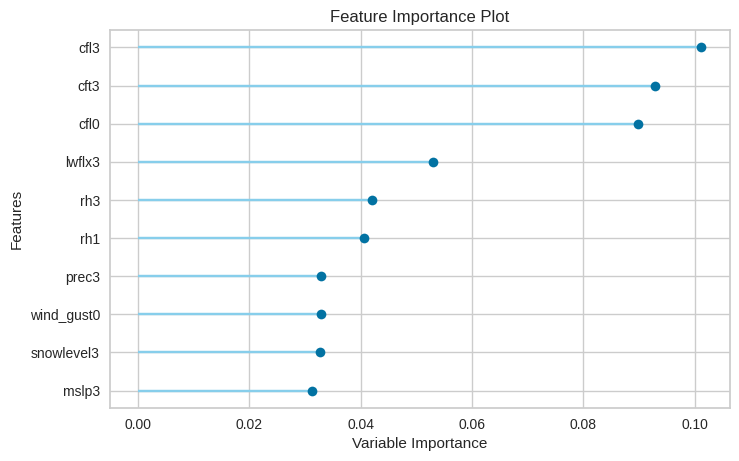

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [22]:
plot_model(et, plot='feature')

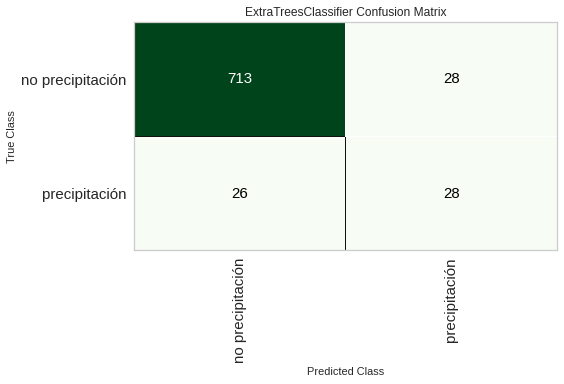

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [19]:
plot_model(et, plot='confusion_matrix')

In [14]:
catboost = create_model('catboost')

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=catboost, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=True, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions


ValueError: ignored